In [1]:
import collections
import pathlib

# データ処理周り
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

# 可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import cm # colormap
import seaborn as sns
%matplotlib inline

# pandasのwarningが邪魔なので
import warnings
warnings.filterwarnings('ignore')

# options
# pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

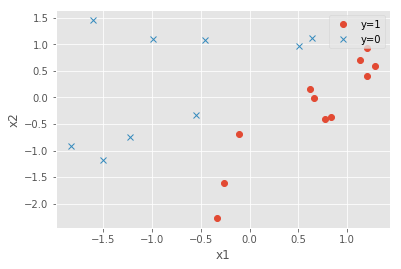

In [64]:
#学習データの読み込み
train=np.loadtxt("../input/images2.csv",delimiter=",",skiprows=1)
train_x=train[:,0:2]
train_y=train[:,2]

#パラメータの初期化
np.random.seed(20)
theta = np.random.rand(3)

#標準化
mu=train_x.mean(axis=0)
sigma=train_x.std(axis=0)
def standardize(x):
    return (x- mu) / sigma
train_z=standardize(train_x)

#x0を加える
def to_matrix(x):
    x0=np.ones([x.shape[0],1])
    return np.hstack([x0,x])
X=to_matrix(train_z)

#プロット X1とX2
plt.plot(train_z[train_y== 1 ,0], train_z[train_y==1 ,1], "o",label="y=1")
plt.plot(train_z[train_y== 0 ,0], train_z[train_y== 0 ,1], "x",label="y=0")
plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## シグモイド関数

In [67]:
def f(x):
    return 1 / (1 + np.exp(-np.dot(x,theta)))

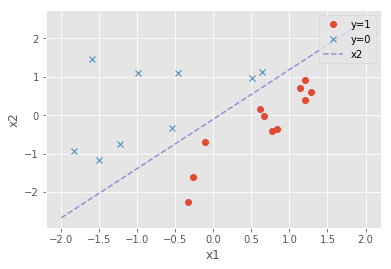

In [70]:
#学習率
ETA = 1e-3
#繰り返し回数
epoch=5000
#学習
for _ in range(epoch):
    theta = theta - ETA* np.dot(f(X) - train_y, X)
x0= np.linspace(-2,2,100)
#プロット X1とX2
plt.plot(train_z[train_y== 1 ,0], train_z[train_y==1 ,1], "o",label="y=1")
plt.plot(train_z[train_y== 0 ,0], train_z[train_y== 0 ,1], "x",label="y=0")
x2= -(theta[0] + theta[1]* x0)/ theta[2]
plt.plot(x0, x2,linestyle="dashed",label="x2")

plt.legend(loc="upper right")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [92]:
#検証
def classify(x):
    return np.where(f(x) >=0.5 ,1 ,0)
classify(to_matrix(standardize(
    [[200,100],[100,200]
    ])))

array([1, 0])